**Project**: **Breast Cancer Prediction**

https://github.com/uic-ds-fall-2023/class-project-masterminds


**Part 1 - Project introduction**

This dataset contains characteristics derived from digitized imaging of fine needle aspirates of a breast tumor cell mass. The goal of this analysis is to train a machine leanring algorightms to accurately distinguish between a benign and malignant tumor to aid in clinical diagnosis.


Ten real-valued features were computed for each cell nucleus:


a) radius (mean of distances from center to points on the perimeter)

b) texture (standard deviation of gray-scale values)

c) perimeter

d) area

e) smoothness (local variation in radius lengths)

f) compactness (perimeter^2 / area - 1.0)

g) concavity (severity of concave portions of the contour)

h) concave points (number of concave portions of the contour)

i) symmetry

j) fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 5 is Mean Perimeter, field 15 is Perimeter SE, field 23 is Perimeter worst.


Number of instances: 569


Number of attributes: 32


Missing attribute values: none


Class distribution: 357 benign, 212 malignant


Original Dataset is available at the [UCA Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)

**Null Hypothesis**: The distribution of each feature is the same for benign and malignant tumors.


**Alternative Hypothesis**: There are significant differences in the distribution of at least one feature between benign and malignant tumors.

In [ ]:
# Package usge
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mannwhitneyu
import sys

In [ ]:
cancerDf = pd.read_csv('wdbc.csv')

**Part 2:** **Data Cleaning and Exploratory Data Analysis:**

**Original size:** Size of the dataframe: (569, 33)

There are no missing values in the dataset

There are no duplicated rows.

Listed below are are the different properties accounted for when describing the characteristics of the cell nuclei present in the image (digitized image of a fine need aspirate (FNA) of a breast mass):

In [ ]:
cancerDf.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [ ]:
# We drop unnecessary columns
cancerDf.drop(['id','Unnamed: 32'], axis = 1, inplace = True)

In [ ]:
# Replace 'M' with 'malignant' and 'B' with 'benign' in the "diagnosis" column
cancerDf['diagnosis'] = cancerDf['diagnosis'].replace({'M': 'Malignant', 'B': 'Benign'})

In [ ]:
# Here we are reordering our data based on the average properties of our images, based on the diagnosis that they are associated with.
# This allows us to make further insights on the varying characteristics that benign and malignants masses possess
# Group by 'Diagnosis' and their means, respectively
cancerDf.groupby('diagnosis').mean()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,,,,,,,,,,,,,,,,,,,,,
Benign,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442
Malignant,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530


In [ ]:
# Group by 'Diagnosis' and display descriptive statistics for selected features
selected_features = ['radius_mean', 'texture_mean', 'area_mean']
grouped_stats = cancerDf.groupby('diagnosis')[selected_features].describe()
print(grouped_stats)

          radius_mean                                                      \
                count       mean       std     min     25%     50%    75%   
diagnosis                                                                   
Benign          357.0  12.146524  1.780512   6.981  11.080  12.200  13.37   
Malignant       212.0  17.462830  3.203971  10.950  15.075  17.325  19.59   

                 texture_mean             ...                area_mean  \
             max        count       mean  ...     75%    max     count   
diagnosis                                 ...                            
Benign     17.85        357.0  17.914762  ...  19.760  33.81     357.0   
Malignant  28.11        212.0  21.604906  ...  23.765  39.28     212.0   

                                                                         
                 mean         std    min    25%    50%      75%     max  
diagnosis                                                                
Benign     462.790196

This code performs a groupby operation on the 'Diagnosis' column and calculates descriptive statistics (count, mean, standard deviation, minimum, 25th percentile, median (50th percentile), 75th percentile, and maximum) for the selected features ('radius_mean', 'texture_mean', 'area_mean') for each diagnosis category ('benign' and 'malignant').

In [ ]:
# Create dataframes for Benign and Malignant components of Diagnosis
benign_df = cancerDf[cancerDf['diagnosis'] == 0]
malignant_df = cancerDf[cancerDf['diagnosis'] == 1]
# Create a list of features related to mean tumor characteristics
features_means = list(cancerDf.columns[1:11])

##Import functions used to plot graphs

In [ ]:
paths = '/content/plotFunctions.py'
sys.path.append(paths)
import plotFunctions

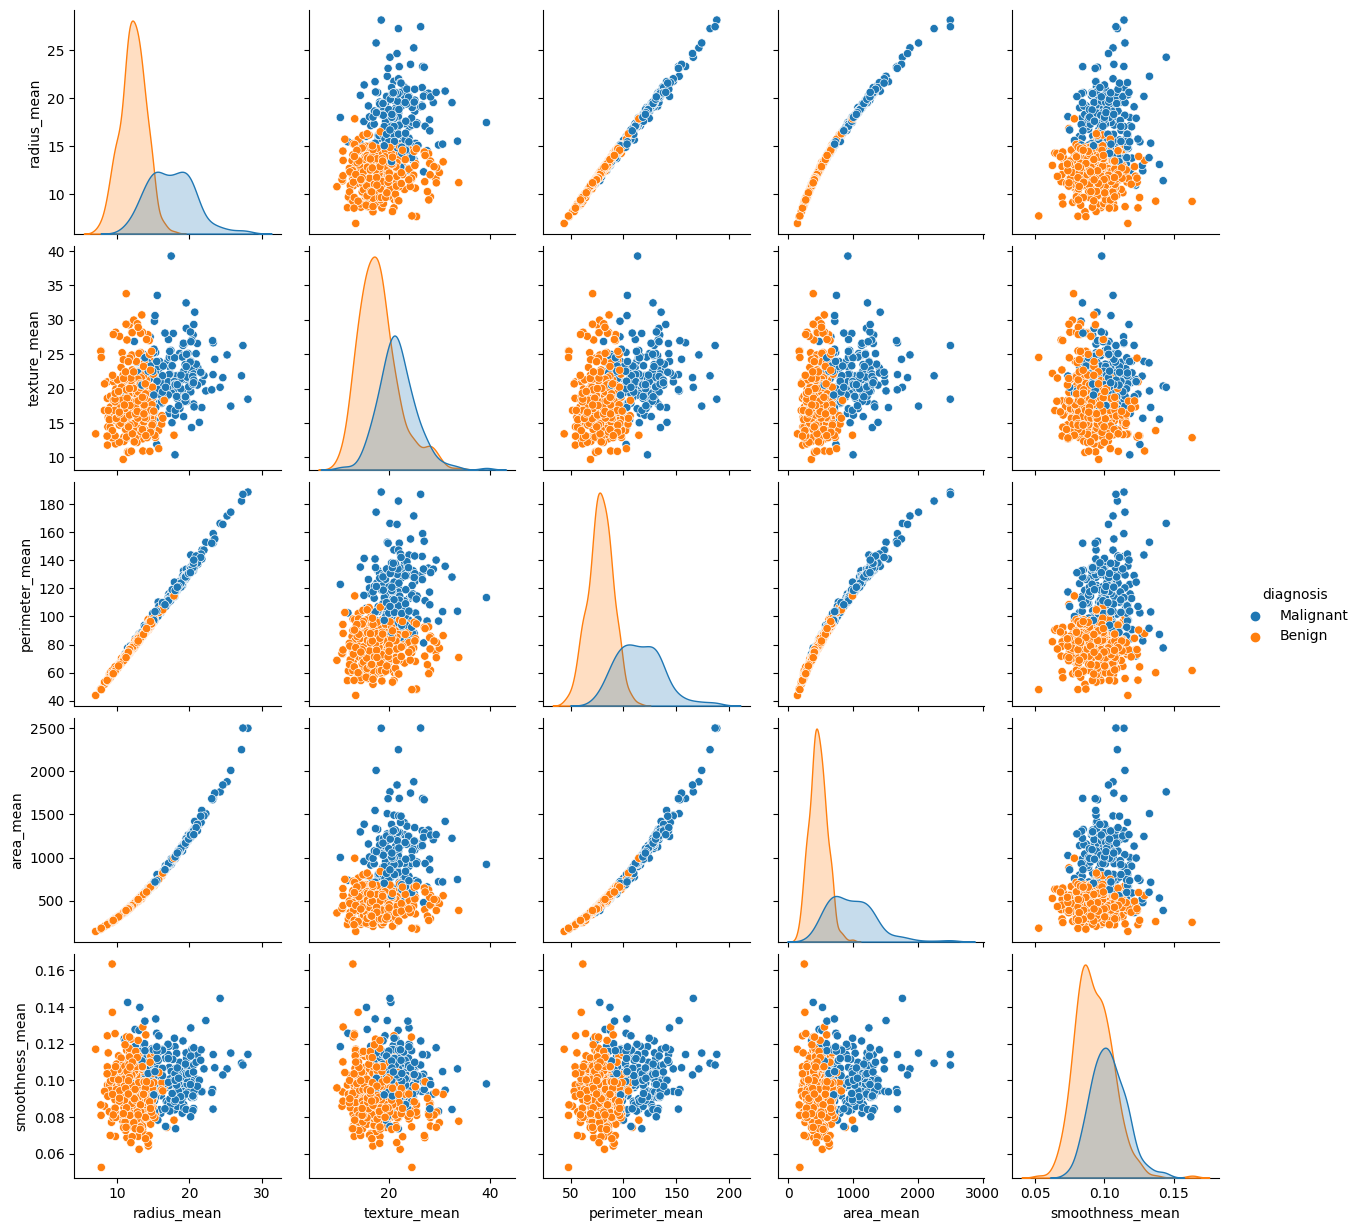

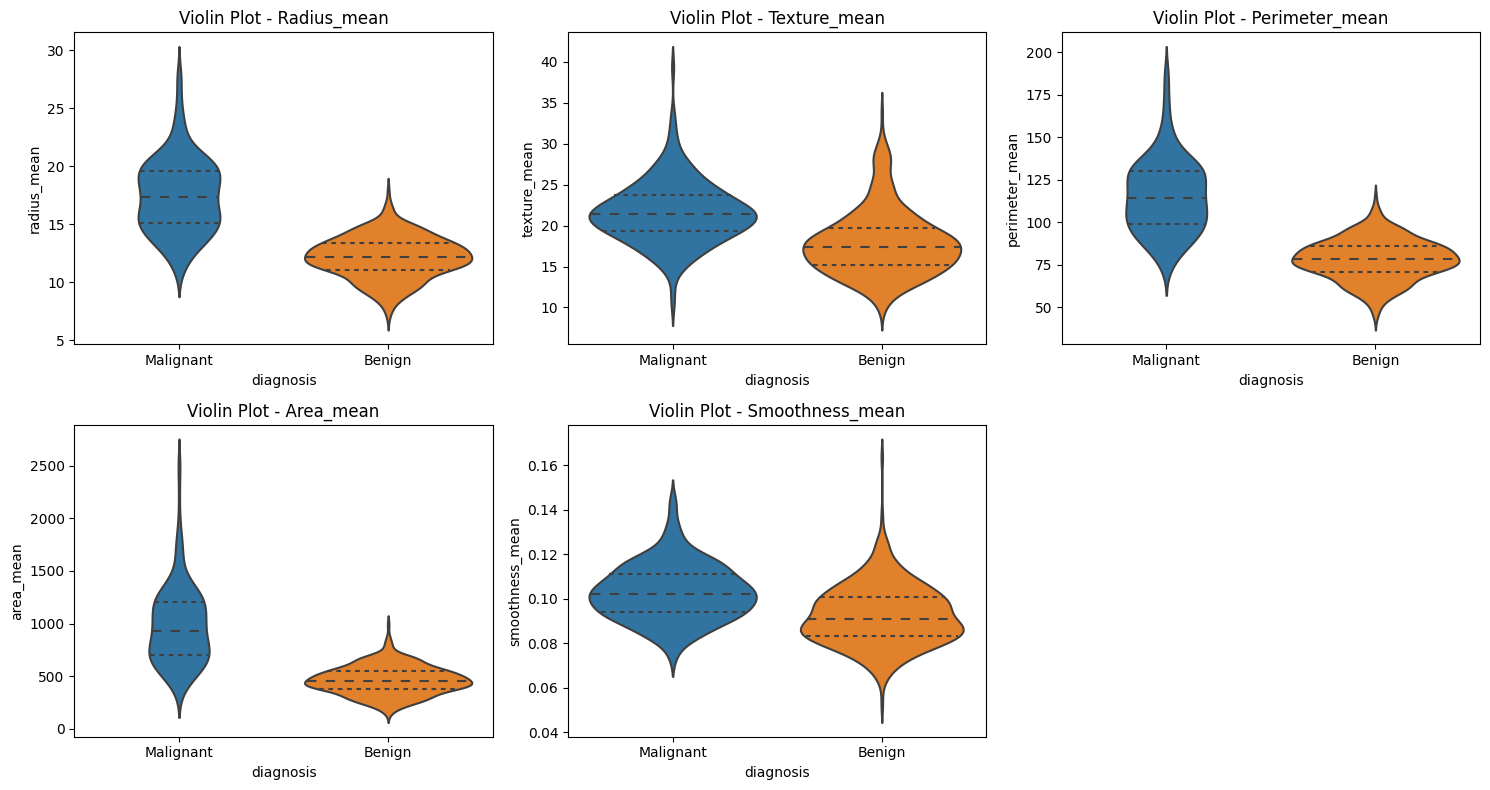

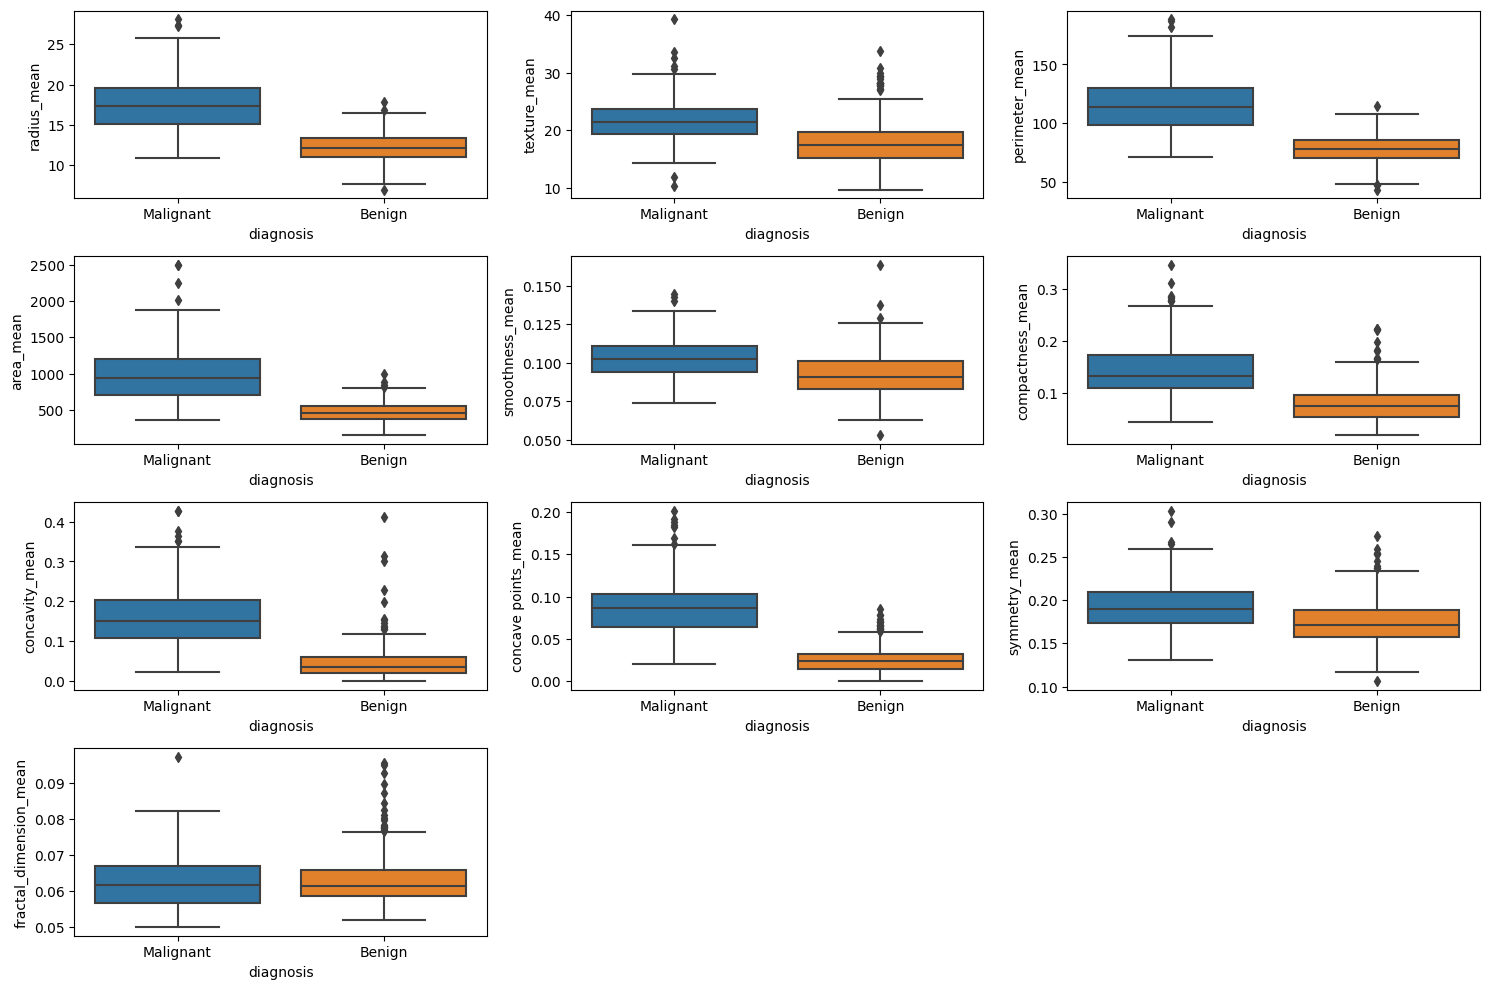

In [ ]:
# Pairplot for selected features
selected_features = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean']
# function to plot
plotFunctions.plot_data_1(cancerDf, selected_features)

These visualizations help in understanding the distribution of individual features, relationships between features, and differences between malignant and benign tumors. The pairplot provides a comprehensive view of pairwise relationships, while the violin plots and boxplots focus on specific features to highlight their distributions and statistical measures.

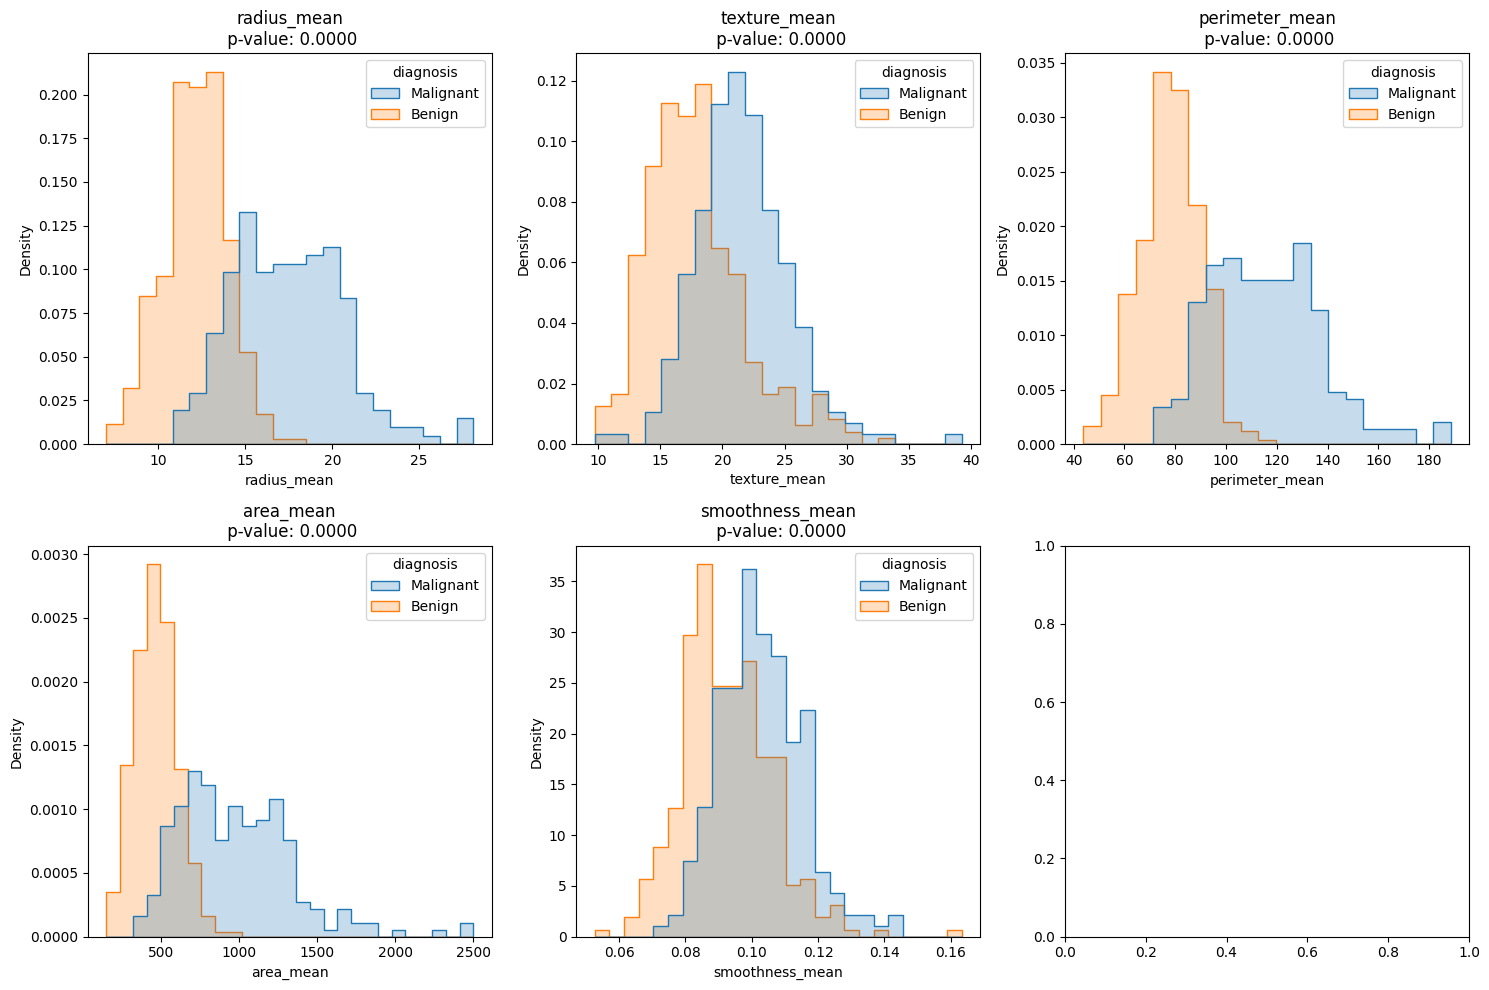

In [ ]:
# Assuming cancerDf is your DataFrame
selected_features = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean']
# Create a figure
plotFunctions.plot_data_2(cancerDf, selected_features)

The code is a part of exploratory data analysis aiming to visualize and compare the distributions of selected tumor features for benign and malignant cases.The rounded p-values are included in the plot titles to provide information about the statistical significance of differences in feature distributions between the two tumor types.

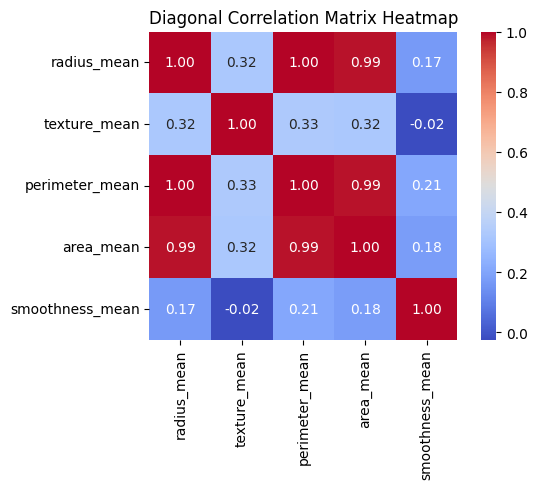

In [ ]:
# Select features for the correlation matrix
selected_features = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean']
# Calculate the correlation matrix
correlation_matrix = cancerDf[selected_features].corr()
# Create a diagonal correlation matrix with a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Diagonal Correlation Matrix Heatmap')
plt.show()

**Part 3:Machine Learning / Statistics Analysis:**

The following will feature the three model types that we utilized to further understand the characteristics of benign and malignant masses.



**1. Decision Tress Classification:**

In [ ]:
train, test = plotFunctions.decision_tree(cancerDf)
print("Train data accuracy:", train)
print("Test data accuracy:", test)

Train data accuracy: 1.0
Test data accuracy: 0.916083916083916


Decision trees can offer insights into which features are most important for making a prediction. In the context of breast cancer prediction, this means identifying which characteristics of a tumor (like size, texture, perimeter, etc.) are most indicative of whether it is benign or malignant.

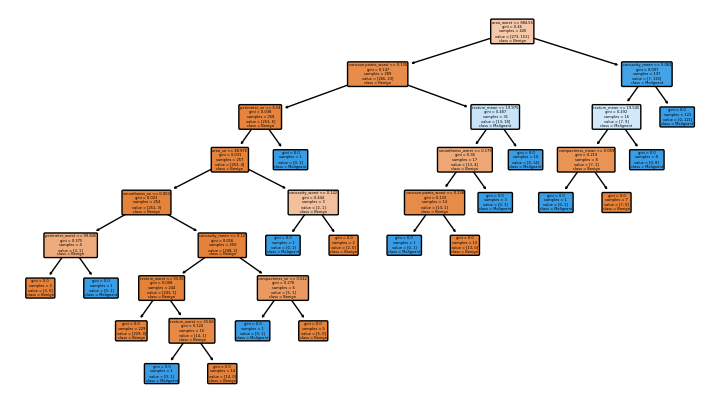

(1.0, 0.916083916083916)

In [ ]:
import importlib
importlib.reload(plotFunctions)
plotFunctions.decision_tree_and_plot(cancerDf)

Decision tree classifiers are powerful and straightforward machine learning models that are utilized for both classification and regression applications. Their accuracy is determined by how well they can split data according on specific criteria, which is often measured using metrics such as accuracy, precision, recall, and the F1-score. These metrics evaluate the model's ability to categorize data points accurately in both training and testing sets. choice trees are represented visually as a branching structure, with each core node representing a choice based on data attributes and each leaf node representing a categorization or decision conclusion. This tree layout makes the decision-making process clear and simple to understand.

**2. K-Nearest Neighbors (KNN) Supervised Machine Learning Algorithm:**



In [ ]:
accuracy, confusion_mat, classification_rep = plotFunctions.knn_neighbor(cancerDf)
print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{confusion_mat}")
print(f"Classification Report:\n{classification_rep}")

Accuracy: 0.9473684210526315
Confusion Matrix:
[[68  3]
 [ 3 40]]
Classification Report:
              precision    recall  f1-score   support

      Benign       0.96      0.96      0.96        71
   Malignant       0.93      0.93      0.93        43

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



The KNN model demonstrates strong performance in distinguishing between tumor types, with an accuracy of 96%.

High precision, recall, and F1-score values, along with the confusion matrix details, validate the model's effectiveness.

After evaluating various K-values, 4 was selected for its balanced performance.

The results support our hypothesis that the model accurately predicts benign or malignant masses based on FNA image features, offering confidence in early cancer diagnosis.

**Benefits**

KNN makes minimal assumptions about the underlying data distribution. This flexibility is advantageous when the relationship between features and outcomes is complex and not easily modeled by parametric methods.

**Drawbacks**

The choice of k and the distance metric can have a huge impact on the performance of the algorithm, and these hyperparameters must be carefully tuned to achieve good results.

**Logistic Regression Model**

In [ ]:
import importlib
importlib.reload(plotFunctions)
x = plotFunctions.train_logistic_regression(cancerDf)
print("model accuracy", x)

model accuracy 0.9766081871345029


The accuracy score is approximately 97.66%, which suggests that the model is performing well on the test data.

<Figure size 600x400 with 0 Axes>

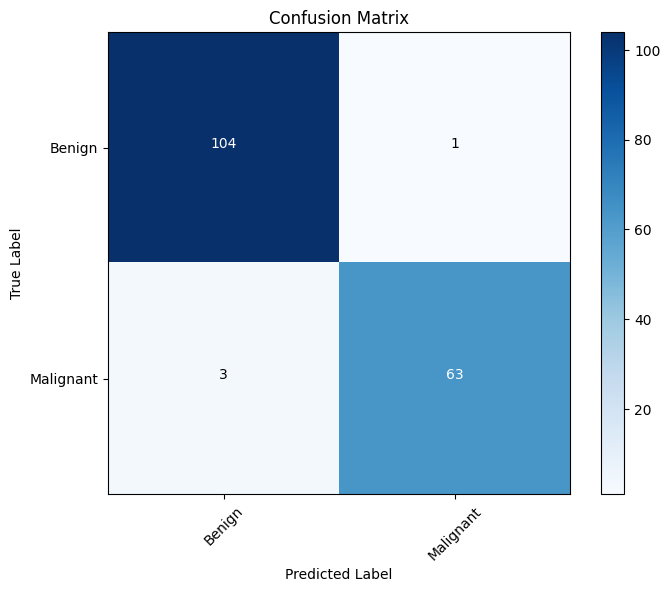

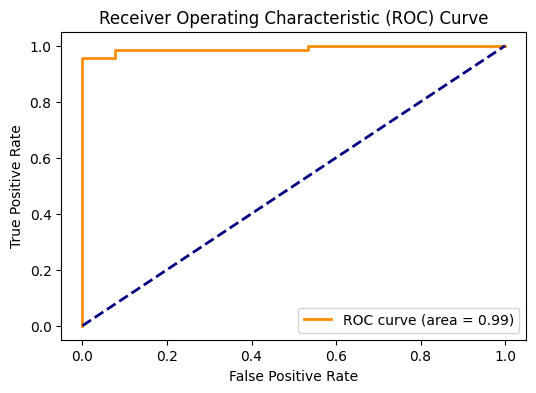

In [ ]:
X = cancerDf.drop("diagnosis", axis = 1)
y = cancerDf["diagnosis"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)
log_model = LogisticRegression()
log_model.fit(scaled_X_train,y_train)
y_pred = log_model.predict(scaled_X_test)
score = accuracy_score(y_test,y_pred, normalize=True)
plotFunctions.plot_confusion_matrix_and_roc(y_test, y_pred, log_model, scaled_X_test)

Logistic regression is a statistical method for binary classification in machine learning. It simulates the likelihood of a specific class or occurrence by modifying linear regression outputs with the logistic function. The accuracy of logistic regression, which reflects how often the model correctly predicts the outcome, is an important indicator for evaluating its performance. Plots such as Receiver Operating Characteristic (ROC) curves are often used to display logistic regression. These graphs depict the trade-off between the True Positive Rate and the False Positive Rate at various threshold values, which may be used to evaluate the model's predictive skills in various contexts. Implementing logistic regression and assessing its accuracy are critical in sectors where binary outcomes must be predicted, such as medical diagnosis and spam detection.

**Correlation Analysis (Statistical Techniques):**
Model Chosen: Linear Regression, Pearson correlation

**Linear Regression**

**Benefits:**

It captures linear correlations between variables, that is, how one variable affects another linearly.
It can be used to forecast the values of one variable based on the values of another.
It gives coefficients for each input feature, which may be simply translated as the amount of change in the output variable for a unit change in the associated input feature.

**Drawbacks:**

Because it presupposes a linear relationship between variables, it is incapable of capturing non-linear relationships.
Because of the slope computation, it is sensitive to outliers, exactly like Pearson.

**Pearson Correlation:**

**Benefits:**

It represents the linear relationship between two variables.
It generates coefficients ranging from -1 to 1, with -1 indicating maximum negative correlation, 0 indicating no association, and 1 indicating maximum positive correlation. This makes the strength and direction of the association between two variables interpretable and simple to understand.
Coefficients for a large number of data points are incredibly simple to calculate, making it scalable for large datasets.

**Drawbacks:**

It can only record linear correlations between variables, not nonlinear ones.
It computes means and standard deviations, making it susceptible to outliers.

**Conclusion:**

The data and visualizations demonstrates significant differences in the distribution of these features between benign and malignant breast tumors. This supports the Alternative Hypothesis, indicating that the distribution of at least one feature (in this case, all three examined features) differs significantly between benign and malignant tumors.


**Citation:**

1. O. L. Mangasarian and W. H. Wolberg: "Cancer diagnosis via linear programming", SIAM News, Volume 23, Number 5, September 1990, pp 1 & 18.

2. William H. Wolberg and O.L. Mangasarian: "Multisurface method of pattern separation for medical diagnosis applied to breast cytology", Proceedings of the National Academy of Sciences, U.S.A., Volume 87, December 1990, pp 9193-9196.

3. K. P. Bennett & O. L. Mangasarian: "Robust linear programming discrimination of two linearly inseparable sets", Optimization Methods and Software 1, 1992, 23-34 (Gordon & Breach Science Publishers).

4. Goyal, Anant. “Logistic Regression with Keras.” MarkTechPost, 9 Apr. 2021, https://www.marktechpost.com/2021/04/08/logistic-regression-with-keras/.

5. Kristiansen, Søren L. “Nearest Neighbors with Keras and Coreml.” Medium, Medium, 20 May 2019, https://medium.com/@sorenlind/nearest-neighbors-with-keras-and-coreml-755e76fedf36.